**Assignment 3 - RNN**

Epoch 1/10
30/30 [==============================] - 2s 13ms/step - loss: 0.0079
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 6.2476e-04
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 3.3095e-04
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 3.2412e-04
Epoch 5/10
30/30 [==============================] - 0s 13ms/step - loss: 3.1352e-04
Epoch 6/10
30/30 [==============================] - 0s 13ms/step - loss: 3.0625e-04
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 2.9715e-04
Epoch 8/10
30/30 [==============================] - 1s 23ms/step - loss: 3.3811e-04
Epoch 9/10
30/30 [==============================] - 1s 24ms/step - loss: 2.9281e-04
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 2.7857e-04


6/6 [==============================] - 0s 6ms/step - loss: 2.8195e-04
Test Loss: 0.000281948916381225
6/6 [==============================] - 0s 5ms/step


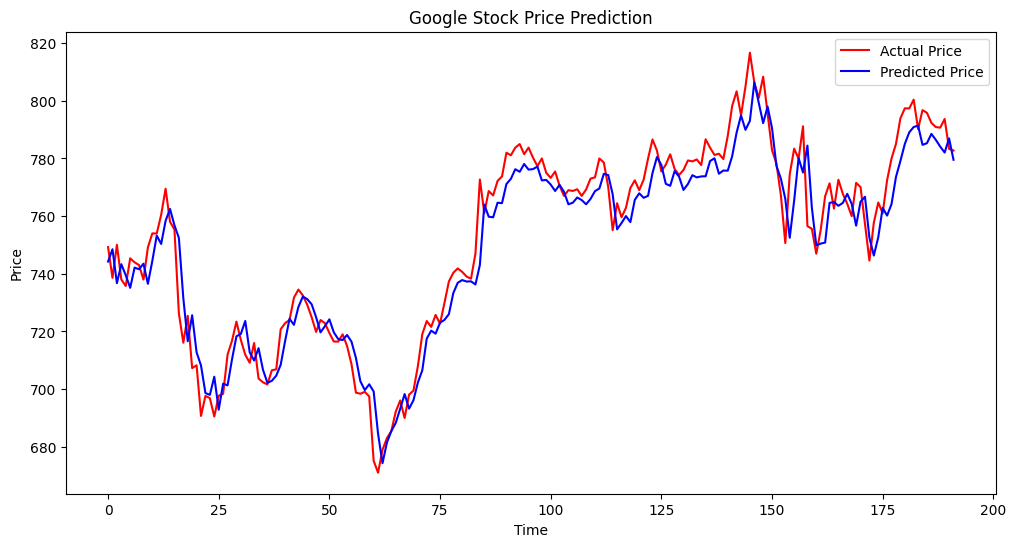

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv')

# Extract the 'Open' prices
prices = data['Open'].values

# Perform data scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Define the function to create input-output pairs
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set the sequence length
sequence_length = 60

# Create training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the RNN model
model = tf.keras.Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/10
39/39 [==============================] - 2s 4ms/step - loss: 0.0439
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 9.1586e-04
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 8.4274e-04
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 8.5128e-04
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 8.4575e-04
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 7.8948e-04
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 6.8567e-04


1/1 [==============================] - 0s 206ms/step - loss: 0.0012
Test Loss: 0.0012348474701866508


1/1 [==============================] - 0s 172ms/step


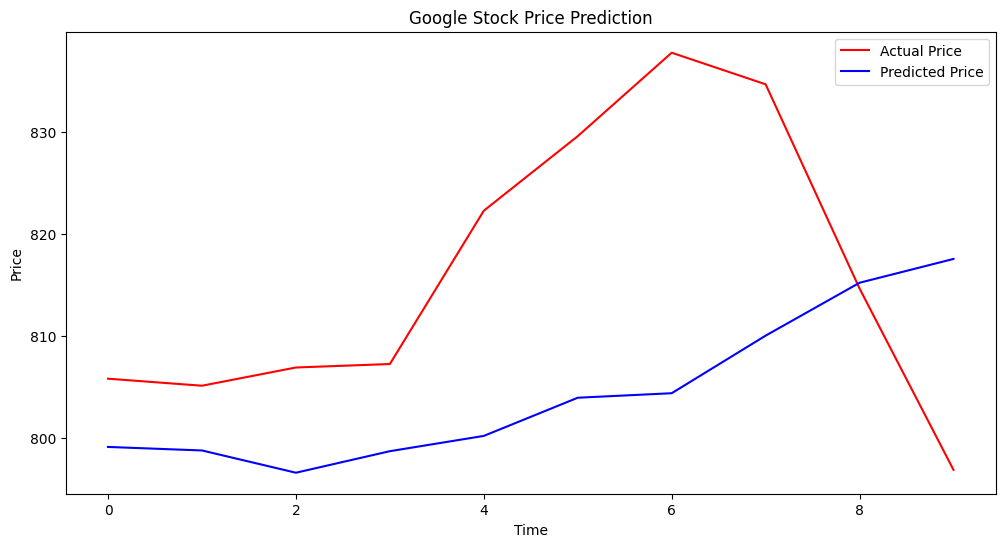

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the training data
train_data = pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv')

# Load the testing data
test_data = pd.read_csv('/content/sample_data/Google_Stock_Price_Test.csv')

# Extract the 'Open' prices for training
train_prices = train_data['Open'].values

# Extract the 'Open' prices for testing
test_prices = test_data['Open'].values

# Perform data scaling
scaler = MinMaxScaler()
scaled_train_prices = scaler.fit_transform(train_prices.reshape(-1, 1))
scaled_test_prices = scaler.transform(test_prices.reshape(-1, 1))

# Define the function to create input-output pairs
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set the sequence length
sequence_length = 10

# Create training sequences
X_train, y_train = create_sequences(scaled_train_prices, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(scaled_test_prices, sequence_length)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_prices[sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# New section

# New section

**Assignment 2 - CNN**


313/313 [==============================] - 3s 9ms/step - loss: 0.3674 - accuracy: 0.8682
Test Loss: 0.3673690855503082
Test Accuracy: 0.8682000041007996
1/1 [==============================] - 0s 82ms/step


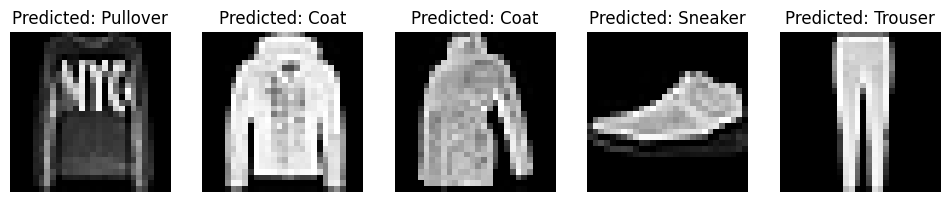

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Build the CNN model
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Choose random images from the test dataset
num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images)

# Make predictions on the selected images
predictions = model.predict(x_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images with their predicted classes
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')

plt.show()



**Assignment 1 - Linear Regression**

Epoch 1/5
516/516 [==============================] - 4s 5ms/step - loss: 5.8318 - val_loss: 4.8701
Epoch 2/5
516/516 [==============================] - 2s 4ms/step - loss: 3.6657 - val_loss: 3.0754
Epoch 3/5
516/516 [==============================] - 3s 5ms/step - loss: 2.3501 - val_loss: 1.9650
Epoch 4/5
516/516 [==============================] - 4s 8ms/step - loss: 1.5706 - val_loss: 1.2964
Epoch 5/5
129/129 [==============================] - 1s 4ms/step
Mean Squared Error: 0.9410052305137347
Mean Absolute Error: 0.6025485163890946


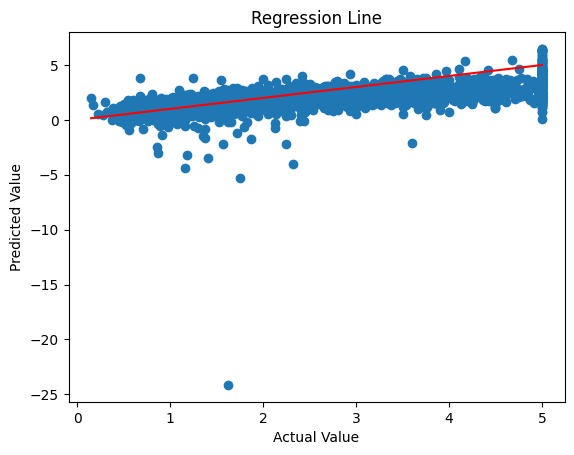

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Boston Housing dataset
boston = fetch_california_housing()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Scale the features using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the deep neural network
model = tf.keras.Sequential()          ##
model.add(tf.keras.layers.Dense(1, input_shape=(x_train.shape[1],), activation='linear'))

# Compile the model with the mean squared error loss function and Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Train the model on the training data for 100 epochs
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the testing data
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

import matplotlib.pyplot as plt

# Plot the regression line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Regression Line')
plt.show()